In [ ]:
from google.colab import drive
import os
if not os.path.exists('/gd'):
    drive.mount('/gd')

Getting the Google Drive access

In [ ]:
!pip install sentencepiece transformers==4.33 datasets sacremoses sacrebleu -q



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.9/119.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.0/104.0 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.7 MB/s eta 0:00:00


Installing requirements

Step 1 : Getting the Training Dataset


In [ ]:
import pandas as pd
dataset = pd.read_csv('/content/P2H dataset 2 - P2H dataset 2.tsv', sep='\t')
print(dataset.shape)
print(dataset.columns)
dataset.sample(10)

(23017, 2)
Index(['kangri', 'hindi'], dtype='object')


,kangri,hindi
4194,खेचो मांझे हौमौं खै फाबी रूआ सोना,खेतों में हमारे सज रहा सोना
10533,मानदार आदमी है कैसी चीजा दा लाळच नी करदा,ईमानदार किसी चीज का लालच नहीं करता
3766,चीठिया पढ़ी की माऊ दे पैरां हेठा थल्ले दी धरत स...,चिठ्ठी पढ़ कर माँ के पांव तले से ज़मीन खिसक गई
16653,रस्ता ता नी भुली गियो न,रास्ता तो नहीं भूल गए न
15168,कविता क्या लिक्खां,कविता क्या लिखू
18502,मैं एह वी साबत करना चाहंदा कि वाकई अजय दत्त हो...,मैं यह भी साबित करना चाहता हूं कि सच में अजय द...
1140,फ़ी तिन्हां जो बक्खरे बक्खरे पुर्जे पुआईत्ते क...,फिर उनको भिन्न भिन्न पुर्जे डलवाये और घर के चा...
3653,हां तित्यू ई जार लू तुसां खोत्ते पर सुआर थे कन...,वहीं जब आप खोते पर सवार थे और और आपका खानसामा ...
2756,ओ सैह ता ठीक है पर इन्हां दूंह जो पता ही नी हो...,वह तो ठीक है पर इन दोनों को तो पता ही नहीं होगा
9111,रात काटी लोहू छाली–छाली रो,रात गुजारी है लह उछालते उछालते


Spliting the dataset into the test train split

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset['hindi']
y = dataset['kangri']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#X_train.shape, X_test.shape, y_test, y_train

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

print(f'y_test:{y_test}')
print(f'y_train:{y_train}')
print(f'X_train:{X_train}')
print(f'X_test:{X_test}')
print(X)

X_train shape: (18413,)
X_test shape: (4604,)
y_test shape: (4604,)
y_test:10952                             इस वजेह् नैं क्या हुन्दा
19036    पता नी तिन्हां च कितणे मरी चुक्यो कनै कितणे जी...
3912                                तुसां दोनो सबते खरे हन
14013                         न तेरे घरे वाळे यां जो जाणदा
20920      तिथू काळज हुंग्गा ता सारे लोकां जो सहूलत रैण्ही
                               ...                        
6794     राजा सुपने बिच दिक्खदा है जियां ही माता जेल्ला...
3978     पई अज कल तां तेरी सारी उंगलियां क्योच है मैं ब...
20468                       सामणे मंजल थी कने चूक होई गेयी
1435     जां जे संझ होई तां सैह्‌ बब्बरू तली बैठी कनें ...
2736     अपर जेहड़ा पट्ट कुसी की बगैर खुआए पिआए पोऐ कनै...
Name: kangri, Length: 4604, dtype: object
y_train:19421                           एकी पांधे एक न्हियारा कोठड
13403                        पैहला अबो अबो एहू बी गल ठीक ऐ
18163    तिसा जो एह बी पता लगी गिया जे सैह इसा ही मालणी...
13096                              मिन्जो बडा़ खर

Training a new sentencepiece tokenizer model in order to add its tokens to the existing NLLB tokenizer.

In [ ]:
import gc
import torch

def cleanup():
    """Try to free GPU memory"""
    gc.collect()
    torch.cuda.empty_cache()

In [ ]:
import sentencepiece as spm

text_file = '/content/text k.txt'
SPM_PREFIX = 'spm_kang'
print(text_file)

# Reduce vocab_size
spm.SentencePieceTrainer.train(
    input = text_file,
    model_prefix = SPM_PREFIX,
    vocab_size =16384,
    character_coverage = 1,
    num_threads = 16,
    shuffle_input_sentence = True,
    bos_id = 0,
    eos_id = 1,
    pad_id = 2,
    unk_id = 3,
    add_dummy_prefix = True,
    train_extremely_large_corpus = False,
    max_sentencepiece_length = 128,
    max_sentence_length = 4192*4
)



/content/text k.txt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

extracting the sentencepiece model from the standard NLLB tokenizer and enriching it from all tokens from the Kangri that have been missing from the NLLB tokenizer

In [ ]:
from sentencepiece import sentencepiece_model_pb2 as sp
from transformers import NllbTokenizer, AutoModelForSeq2SeqLM

# Use NllbTokenizer instead of nllbtokenizer
tokenizer = NllbTokenizer.from_pretrained('facebook/nllb-200-distilled-600M') # this line was incorrectly assigning a model to the tokenizer variable
sp_trained = spm.SentencePieceProcessor(model_file=f'{SPM_PREFIX}.model')
added_spm = sp.ModelProto()
added_spm.ParseFromString(sp_trained.serialized_model_proto())
old_spm = sp.ModelProto()
old_spm.ParseFromString(tokenizer.sp_model.serialized_model_proto())

nllb_tokens_set = {p.piece for p in old_spm.pieces}
prev_min_score = old_spm.pieces[-1].score
for p in added_spm.pieces:
  piece = p.piece

  if p.type !=1:
    continue
  if piece not in nllb_tokens_set:
    new_p = sp.ModelProto().SentencePiece()
    new_p.piece = piece
    new_p.score = prev_min_score + prev_min_score
    old_spm.pieces.append(new_p)

NEW_SPM_NAME = 'spm_nllb_kang.model'
with open(NEW_SPM_NAME, 'wb') as f:
  f.write(old_spm.SerializeToString())

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


sentencepiece.bpe.model:   0%|          | 0.00/4.85M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/3.55k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/564 [00:00<?, ?B/s]

updating the neural network weights: add new embeddings for the freshly added tokens. In NLLB, the token embeddings reside in the parameter called **shared**. It is used both in the encoder and decoder input embeddings and in the last decoder layer that predicts the distribution of the next token.

In [ ]:
!pip install tqdm
from tqdm import tqdm #Import the tqdm module

from transformers import AutoModelForSeq2SeqLM
model_name = 'facebook/nllb-200-distilled-600M'

# loading the tokenizers
tokenizer_old = NllbTokenizer.from_pretrained(model_name)
tokenizer = NllbTokenizer.from_pretrained(model_name, vocab_file=NEW_SPM_NAME)#added new lang to the old tokenizer
print(f'old tokenizer:{len(tokenizer_old)}, tokenizer:{len(tokenizer)}')
added_vocab = set(tokenizer.get_vocab()).difference(set(tokenizer_old.get_vocab()))
print(f'added vocab:{len(added_vocab)}')

# loading and resizing the model
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
model.resize_token_embeddings(len(tokenizer))

# re-initializing the new embeddings
for t in tqdm(added_vocab):
    tt = tokenizer_old(t, add_special_tokens=False).input_ids
    if len(tt) == 0:
        tt = [tokenizer_old.unk_token_id]
    idx = tokenizer.convert_tokens_to_ids(t)
    model.model.shared.weight.data[idx] = model.model.shared.weight.data[tt].mean(0)

old tokenizer:256204, tokenizer:268525
added vocab:12321


config.json:   0%|          | 0.00/846 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:311: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/2.46G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:488: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(checkpoint_file, map_location=map

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

You are resizing the embedding layer without providing a `pad_to_multiple_of` parameter. This means that the new embedding dimension will be 268525. This might induce some performance reduction as *Tensor Cores* will not be available. For more details about this, or help on choosing the correct value for resizing, refer to this guide: https://docs.nvidia.com/deeplearning/performance/dl-performance-matrix-multiplication/index.html#requirements-tc
100%|██████████| 12321/12321 [00:03<00:00, 3687.42it/s]


Adding a new language tag

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

def add_new_language_to_nllb(model_name, new_lang_code, similar_lang_code):
    # Load the tokenizer and model
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

    # Add the new language code to the vocabulary
    num_added_tokens = tokenizer.add_tokens([new_lang_code])

    # Get the IDs for the new and similar language codes
    new_lang_id = tokenizer.convert_tokens_to_ids(new_lang_code)
    similar_lang_id = tokenizer.convert_tokens_to_ids(similar_lang_code)

    # Update the lang_code_to_id dictionary
    if hasattr(tokenizer, 'lang_code_to_id'):
        tokenizer.lang_code_to_id[new_lang_code] = new_lang_id

    # Update additional special tokens
    if new_lang_code not in tokenizer.additional_special_tokens:
        tokenizer.add_special_tokens({'additional_special_tokens': [new_lang_code]})

    # Resize the model's token embeddings
    model.resize_token_embeddings(len(tokenizer))

    # Initialize the new language embedding with a similar language
    with torch.no_grad():
        model.model.shared.weight[new_lang_id] = model.model.shared.weight[similar_lang_id].clone()

    return tokenizer, model

# Usage
model_name = "facebook/nllb-200-distilled-600M"
new_lang_code = "kang_deva"
similar_lang_code = "hin_Deva"

tokenizer, model = add_new_language_to_nllb(model_name, new_lang_code, similar_lang_code)

# Verify the new language has been added
print(f"New language '{new_lang_code}' ID: {tokenizer.convert_tokens_to_ids(new_lang_code)}")
print(f"'{new_lang_code}' in additional_special_tokens: {new_lang_code in tokenizer.additional_special_tokens}")
if hasattr(tokenizer, 'lang_code_to_id'):
    print(f"'{new_lang_code}' in lang_code_to_id: {new_lang_code in tokenizer.lang_code_to_id}")
else:
    print("Note: This tokenizer doesn't have a 'lang_code_to_id' attribute.")

tokenizer.json:   0%|          | 0.00/17.3M [00:00<?, ?B/s]

You are resizing the embedding layer without providing a `pad_to_multiple_of` parameter. This means that the new embedding dimension will be 256205. This might induce some performance reduction as *Tensor Cores* will not be available. For more details about this, or help on choosing the correct value for resizing, refer to this guide: https://docs.nvidia.com/deeplearning/performance/dl-performance-matrix-multiplication/index.html#requirements-tc


New language 'kang_deva' ID: 256204
'kang_deva' in additional_special_tokens: True
'kang_deva' in lang_code_to_id: True


adding a new language code

In [ ]:
import json
import os
import shutil
from typing import List, Tuple

from transformers import NllbTokenizer
from transformers.models.nllb.tokenization_nllb import FAIRSEQ_LANGUAGE_CODES


def update_nllb_tokenizer(
    old_tokenizer: NllbTokenizer,
    new_spm_path: str,
    new_lang_codes: List[str],
) -> NllbTokenizer:
    """
    Create a new tokenizer for NLLB, with an updated sentencepiece model and some new language codes.
    In order to get rid of the old (and wrong) added token encoders/decoders, we save the tokenizer to disk and remove those files.
    :param old_tokenizer: the original tokenizer
    :param new_spm_path: path to the file with the sentncepiece model
    :param new_lang_codes: list of the new codes to add to the tokenizer
    :return:
    """
    TKN_DIR = "old_tokenizer"  # todo: make it a temp dir
    old_tokenizer.save_pretrained(TKN_DIR)

    with open(f"{TKN_DIR}/tokenizer_config.json", "r") as f:
        cfg = json.load(f)
    cfg["added_tokens_decoder"] = {
        k: v
        for k, v in cfg["added_tokens_decoder"].items()
        if k in ["0", "1", "2", "3"]
    }
    cfg["additional_special_tokens"] = []
    with open(f"{TKN_DIR}/tokenizer_config.json", "w") as f:
        json.dump(cfg, f, indent=2)

    # this contains added tokens: language codes and mask
    os.remove(f"{TKN_DIR}/added_tokens.json")
    os.remove(f"{TKN_DIR}/special_tokens_map.json")
    os.remove(f"{TKN_DIR}/sentencepiece.bpe.model")
    shutil.copy(new_spm_path, f"{TKN_DIR}/sentencepiece.bpe.model")

    new_tokenizer = NllbTokenizer.from_pretrained(
        TKN_DIR,
        additional_special_tokens=sorted(FAIRSEQ_LANGUAGE_CODES + new_lang_codes),
    )
    return new_tokenizer





In [ ]:

# Tokenize the data
def tokenize_data(data):
    tokenized_data = tokenizer(data.tolist(), padding=True, truncation=True, return_tensors="pt")
    return tokenized_data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset['hindi'], dataset['kangri'], test_size=0.2, random_state=42)

# Tokenize training and testing sets
X_train_tokenized = tokenize_data(X_train)
X_test_tokenized = tokenize_data(X_test)

# Access the tokenized vectors
input_ids_train = X_train_tokenized['input_ids']
attention_mask_train = X_train_tokenized['attention_mask']
input_ids_test = X_test_tokenized['input_ids']
attention_mask_test = X_test_tokenized['attention_mask']

# Print the shapes of the tokenized vectors
print(input_ids_train.shape)
print(attention_mask_train.shape)
print(input_ids_test.shape)
print(attention_mask_test.shape)

In [ ]:


stats = tokenizer.batch_decode(input_ids_train)

tokenizer.batch_decode(attention_mask_train)
tokenizer.batch_decode(input_ids_test)
tokenizer.batch_decode(attention_mask_test)

import re

def word_tokenize(text):
  if isinstance(text, str): # Check if the input is a string
    return re.findall('(\w+|[^\w\s])', text)
  else:
    return [] # Return an empty list for non-string inputs

smpl_X_train = X_train.sample(18413, random_state=1)
smpl_y_train = y_train.sample(18413, random_state=1)

smpl_X_train['hin_toks'] = smpl_X_train.apply(tokenizer.tokenize)
smpl_X_train['hin_words'] = smpl_X_train.apply(word_tokenize)
smpl_y_train['kang_toks'] = smpl_y_train.apply(tokenizer.tokenize)
smpl_y_train['kang_words'] = smpl_y_train.apply(word_tokenize)

print(smpl_X_train.head())
print(smpl_y_train.head())

src_lang_toks = smpl_X_train[['hin_toks']].apply(len).describe()
tgt_lang_toks = smpl_y_train[['kang_toks']].apply(len).describe()
src_lang_words = smpl_X_train[['hin_words']].apply(len).describe()
tgt_lang_words = smpl_y_train[['kang_words']].apply(len).describe()





print(src_lang_toks['mean'] /src_lang_words['mean'])
print(tgt_lang_toks['mean'] / tgt_lang_words['mean'])


from tqdm.auto import tqdm ,trange
import random

texts_with_unk = [
    text for text in tqdm(y_train)
    if tokenizer.unk_token in text

]

print(len(texts_with_unk))

# Check if texts_with_unk is empty before sampling
if texts_with_unk:
  s =random.sample(texts_with_unk, min(5, len(texts_with_unk))) # Ensure the sample size is not larger than the population
  for i in s:
    print(i)
else:
  print("No texts contain the unk_token.")

1179     बच्चों को अपनी ओर बुलाकर कहने लगी क्यूं बेमतलब...
14287    यह सुनकर सभी अभियुक्त पूछने लगे वकील साहब क्या...
8650     इस बार ब्राह्मण को विश्वास हो गया कि उसने बकरा...
22567      कुर्सियां शामियाने आदि की भी किसी ने हामी भर दी
21074                    मैं महिलाओं से वैसे ही घबराता हूँ
Name: hindi, dtype: object
1179     न्याणेयां जो अप्पू बखी सद्दी नैं गलाणा लग्गी क...
14287    हुण बीह मार्चे जो तुसां सबनाजो फांसिए पर लटकणा...
8650     इस बरी ब्राहमने जो जकीन होईया भई तिनी बकरे यो ...
22567                कुर्सियां शामयाने दी भी कुनी हामी भरी
21074                  मै ता जनासा ते वैसे ही बड़ा घबरांदा
Name: kangri, dtype: object
0.9999456934940806
0.9999456934940806


  0%|          | 0/18413 [00:00<?, ?it/s]

0
No texts contain the unk_token.


**Training the model**


To save some GPU memory, I use Adafactor optimizer instead of the more popular AdamW. I train the model with a learning rate linearly increasing from zero for the first 1000 steps, and then staying at 0.0001. I set a weight_decay to prevent the model parameters from becoming too big, and use a clip_threshold for restricting the norm of the gradient to stabilize the training.


In [ ]:
from transformers.optimization import Adafactor
from transformers import get_constant_schedule_with_warmup
model.cuda();
optimizer = Adafactor(
    [p for p in model.parameters() if p.requires_grad],
    scale_parameter=False,
    relative_step=False,
    lr=1e-4,
    clip_threshold=1.0,
    weight_decay=1e-3,
)
scheduler = get_constant_schedule_with_warmup(optimizer, num_warmup_steps=1000)

To create each training batch, I randomly choose the translation direction {Hindi to Pahadi(Kangri) or reverse}, and randomly sample the sentence pairs. For more advanced training, I could also apply some random data augmentation to them (e.g. replacing words or changing the orthography).

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame named 'dataset' with 'hindi' and 'kangri' columns
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset['hindi'], dataset['kangri'], test_size=0.2, random_state=42)

# Tokenize training and testing sets - Assuming you have a tokenizer defined
X_train_tokenized = tokenize_data(X_train)
X_test_tokenized = tokenize_data(X_test)

# Access the tokenized vectors
input_ids_train = X_train_tokenized['input_ids']
attention_mask_train = X_train_tokenized['attention_mask']
input_ids_test = X_test_tokenized['input_ids']
attention_mask_test = X_test_tokenized['attention_mask']

# Tokenize labels - Ensure you have a tokenizer defined for labels
labels_train = tokenize_data(y_train)
labels_test = tokenize_data(y_test)

# Create a custom Dataset class for your training data
class TranslationDataset(Dataset):
    def __init__(self, input_ids, attention_mask, labels):
        self.input_ids = input_ids
        self.attention_mask = attention_mask
        self.labels = labels

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_mask[idx],
            'labels': self.labels[idx]
        }

# Create dataset objects for train and test sets
train_dataset = TranslationDataset(input_ids_train, attention_mask_train, labels_train['input_ids']) # Access the input_ids from tokenized labels
test_dataset = TranslationDataset(input_ids_test, attention_mask_test, labels_test['input_ids'])  # Access the input_ids from tokenized labels

# Create DataLoader objects for batching
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False, pin_memory=True)

In [ ]:
MODEL_SAVE_PATH = '/gd/MyDrive/models/nllb-hin-kang-v1'

In [ ]:
import torch
from transformers import AdamW, get_linear_schedule_with_warmup
from torch.cuda.amp import autocast, GradScaler
from tqdm.notebook import tqdm
import gc


def train_model(model, train_loader, test_loader, epochs=3, lr=5e-5, accumulation_steps=4):
    model = model.cuda()  # Move model to GPU

    # Initialize optimizer and scheduler
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=0.01)
    num_training_steps = len(train_loader) * epochs
    num_warmup_steps = num_training_steps // 10
    scheduler = get_linear_schedule_with_warmup(
        optimizer, num_warmup_steps=num_warmup_steps, num_training_steps=num_training_steps
    )

    scaler = GradScaler()
    best_test_loss = float('inf')


    for epoch in range(epochs):
        model.train()
        total_loss = 0

        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}", leave=True, dynamic_ncols=True)
        optimizer.zero_grad()

        for step, batch in enumerate(progress_bar):
            # Move batch to GPU
            input_ids = batch['input_ids'].cuda(non_blocking=True)
            attention_mask = batch['attention_mask'].cuda(non_blocking=True)
            labels = batch['labels'].cuda(non_blocking=True)

            # Forward pass with mixed precision
            with autocast():
                outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
                loss = outputs.loss / accumulation_steps  # Normalize loss for gradient accumulation

            # Backward pass
            scaler.scale(loss).backward()

            # Gradient accumulation step
            if (step + 1) % accumulation_steps == 0 or (step + 1) == len(train_loader):
                scaler.unscale_(optimizer)
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

                scaler.step(optimizer)
                scaler.update()
                scheduler.step()

                optimizer.zero_grad()  # Reset gradients

            # Update progress bar
            total_loss += loss.item() * accumulation_steps  # Reverse normalization for display
            avg_loss = total_loss / (step + 1)
            current_lr = scheduler.get_last_lr()[0]

            progress_bar.set_postfix({
                'loss': f"{loss.item():.4f}",
                'avg_loss': f"{avg_loss:.4f}",
                'lr': f"{current_lr:.2e}"
            })

            # Memory management
            del outputs, loss
            if step % 50 == 0:  # Periodic cleanup
                gc.collect()
                torch.cuda.empty_cache()

        # Testing phase
        model.eval()
        test_loss = 0
        test_progress_bar = tqdm(test_loader, desc="Testing", leave=False, dynamic_ncols=True)

        with torch.no_grad():
            for batch in test_progress_bar:
                input_ids = batch['input_ids'].cuda(non_blocking=True)
                attention_mask = batch['attention_mask'].cuda(non_blocking=True)
                labels = batch['labels'].cuda(non_blocking=True)

                with autocast():
                    outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
                test_loss += outputs.loss.item()

                del outputs

        avg_test_loss = test_loss / len(test_loader)
        print(f"\nEpoch {epoch+1} - Average test loss: {avg_test_loss:.4f}")

        # Save the best model
        if avg_test_loss < best_test_loss:
            best_test_loss = avg_test_loss
            model.save_pretrained(MODEL_SAVE_PATH)
            tokenizer.save_pretrained(MODEL_SAVE_PATH)


        # Clear memory at the end of each epoch
        gc.collect()
        torch.cuda.empty_cache()

print("Starting training...")

    # Train the model using your preprocessed data
train_model(model, train_loader, test_loader, epochs=3)

torch.cuda.empty_cache()


Starting training...


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
<ipython-input-15-6d49f3ea6295>:19: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()


Epoch 1/3:   0%|          | 0/9207 [00:00<?, ?it/s]

<ipython-input-15-6d49f3ea6295>:37: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Testing:   0%|          | 0/2302 [00:00<?, ?it/s]

<ipython-input-15-6d49f3ea6295>:83: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():



Epoch 1 - Average test loss: 0.1963


Epoch 2/3:   0%|          | 0/9207 [00:00<?, ?it/s]

<ipython-input-15-6d49f3ea6295>:37: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Testing:   0%|          | 0/2302 [00:00<?, ?it/s]

<ipython-input-15-6d49f3ea6295>:83: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():



Epoch 2 - Average test loss: 0.1663


Epoch 3/3:   0%|          | 0/9207 [00:00<?, ?it/s]

<ipython-input-15-6d49f3ea6295>:37: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Testing:   0%|          | 0/2302 [00:00<?, ?it/s]

<ipython-input-15-6d49f3ea6295>:83: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():



Epoch 3 - Average test loss: 0.1566


In [ ]:
MODEL_SAVE_PATH = '/gd/MyDrive/models/nllb-hin-kang-v1'

In [ ]:
model.save_pretrained(MODEL_SAVE_PATH)
tokenizer.save_pretrained(MODEL_SAVE_PATH)

('/gd/MyDrive/models/nllb-hin-kang-v1/tokenizer_config.json',
 '/gd/MyDrive/models/nllb-hin-kang-v1/special_tokens_map.json',
 '/gd/MyDrive/models/nllb-hin-kang-v1/sentencepiece.bpe.model',
 '/gd/MyDrive/models/nllb-hin-kang-v1/added_tokens.json',
 '/gd/MyDrive/models/nllb-hin-kang-v1/tokenizer.json')

In [ ]:
!ls -alsh $MODEL_SAVE_PATH

total 2.4G
 512 -rw------- 1 root root   26 Oct 25 12:31 added_tokens.json
1.0K -rw------- 1 root root  896 Oct 25 12:30 config.json
 512 -rw------- 1 root root  184 Oct 25 12:30 generation_config.json
2.3G -rw------- 1 root root 2.3G Oct 25 12:31 pytorch_model.bin
4.7M -rw------- 1 root root 4.7M Oct 25 12:31 sentencepiece.bpe.model
 512 -rw------- 1 root root  333 Oct 25 12:31 special_tokens_map.json
1.0K -rw------- 1 root root  544 Oct 25 12:31 tokenizer_config.json
 17M -rw------- 1 root root  17M Oct 25 12:31 tokenizer.json


In [ ]:
!cp $MODEL_SAVE_PATH/pytorch_model.bin $MODEL_SAVE_PATH/pytorch_model_60k.binA

In [ ]:
pip install transformers huggingface_hub


In [ ]:
!pip install huggingface_hub
from huggingface_hub import HfApi, login
from huggingface_hub.utils import HfFolder

# Log in to Hugging Face Hub
# This will ask for your Hugging Face token if you haven't logged in before.
login()

# Create the Hugging Face Hub API object
api = HfApi()

# Define the repository ID
repo_id = "cloghost/nllb-200-distilled-600M-hin-kang-v1"

# Create the repository
try:
    api.create_repo(repo_id=repo_id, exist_ok=True)
    print(f"Repository '{repo_id}' created or already exists.")
except Exception as e:
    print(f"Error creating repository: {e}")


In [ ]:
from transformers import NllbTokenizer, AutoModelForSeq2SeqLM
model_name  = '/content/drive/MyDrive/models/nllb-hin-kang-v1'
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
tokenizer = NllbTokenizer.from_pretrained(model_name)


tokenizer.push_to_hub(repo_id)
model.push_to_hub(repo_id)

README.md:   0%|          | 0.00/31.0 [00:00<?, ?B/s]

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 200}


model.safetensors:   0%|          | 0.00/2.46G [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/cloghost/nllb-200-distilled-600M-hin-kang-v1/commit/69aacff072dd45e0d079693e1a576a9e03ad1978', commit_message='Upload M2M100ForConditionalGeneration', commit_description='', oid='69aacff072dd45e0d079693e1a576a9e03ad1978', pr_url=None, pr_revision=None, pr_num=None)

In [2]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, NllbTokenizer

model_load_name = "cloghost/nllb-200-distilled-600M-hin-kang-v1"

# Load the model and tokenizer by explicitly specifying the directory path
model = AutoModelForSeq2SeqLM.from_pretrained(model_load_name)
tokenizer = NllbTokenizer.from_pretrained(model_load_name)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/910 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.46G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/184 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/36.8k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/4.85M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/4.49k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.3M [00:00<?, ?B/s]

In [34]:
import textwrap

# Function to print wrapped text
def print_wrapped(text, width=80):
    # If text is a list, join it into a single string
    if isinstance(text, list):
        text = ' '.join(text)
    # Ensure width is an integer
    width = int(width)  # Convert width to an integer
    wrapper = textwrap.TextWrapper(width=width)
    word_list = wrapper.wrap(text)
    for line in word_list:
        print(line)

In [6]:
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline

# Set model name
model_name = "cloghost/nllb-200-distilled-600M-hin-kang-v1"

# Load model and tokenizer
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Set device dynamically
device = 0 if torch.cuda.is_available() else -1  # 0 for GPU, -1 for CPU

# Initialize translation pipeline with dynamic device allocation
translator = pipeline(
    "translation",
    model=model,
    tokenizer=tokenizer,
    src_lang="hin_Deva",
    tgt_lang="kang_Deva",
    device=device
)

# Sample Hindi text
text = """मगर हिमाचली भाषा तो पहले से बोली जा रही है।
लोग सदियों से ही इसके संग जी रहे हैं।
पहाड़ी भाषा का इतिहास हिन्दी साहित्य के आदिकाल ,‌जिसे सिद्ध चारण काल के नाम से भी जानते हैं
"""  # Example text in Hindi

# Perform translation
translation = translator(text)


In [7]:
print(print_wrapped(translation[0]['translation_text']))

पर हिमाचलिया दी भाषा तां पैले ते बोली जा दी है लोक सदियां ते ई इस कने जी करदे हन
पहाड़ी भाषा दा इतिहास हिन्दी साहित्य दे आदिकाल जिसजो सिद्ध चारण काल दे नाएं ते
भी जाणदे हन
None


In [8]:
def translate(
    text, src_lang='hin_Deva', tgt_lang='kang_Deva',
    a=32, b=3, max_input_length=1024, num_beams=4, **kwargs
):
    """Turn a text or a list of texts into a list of translations"""
    tokenizer.src_lang = src_lang
    tokenizer.tgt_lang = tgt_lang
    inputs = tokenizer(
        text, return_tensors='pt', padding=True, truncation=True,
        max_length=max_input_length
    )
    model.eval()
    result = model.generate(
        **inputs.to(model.device),
        forced_bos_token_id=tokenizer.convert_tokens_to_ids(tgt_lang),
        max_new_tokens=int(a + b * inputs.input_ids.shape[1]),
        num_beams=num_beams, **kwargs
    )
    return tokenizer.batch_decode(result, skip_special_tokens=True)



In [9]:
# Example usage:
t = '''
अगर हम अपनी माता ( हिमाचली भाषा ) के नहीं हो सकते तो विमाता के कहाँ होगे
माता ज्वाला देवी का मंदिर भी देश के 51 शक्तिपीठों में से एक है
जो कि हिमाचल प्रदेश के कांगड़ा जिले में शिवालिक पहाड़ियों के मध्य कालीधार पहाड़ी के बीचों बीच बसा हुआ है ।
महंगाई की मार
अरे बहन गीता! कहाँ से आ रही हो ?
मैं बाजार से आ रही हूँ शांति बहन।
'''
out = print_wrapped(translate(t, 'hin_Deva', 'kang_Deva'),width =80)



जे असां अपणिया माता दे नी होई सकदे तां विमाता दे कुथू होणे माता ज्वाला देवी दा
मंदर भी देसे दे 51 शक्तिपीठां च ए जेडा हिमाचल दे कांगड़ा जिले च शिवालिक प्हाडां
दे बिच कालीधर प्हाड़िया दे बिच बसेया ऐ महंगाई दी मार ओ भैणा गीता! कुथू ते औआ
करदी ऐ मैं बजारे ते औआ करदी ऐ शांति भैणा


In [17]:
!pip install sacrebleu rouge-score nltk matplotlib
!pip install indic-nlp-library




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 96.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 13.0 MB/s eta 0:00:00
  Attempting uninstall: docutils
    Found existing installation: docutils 0.18.1
    Uninstalling docutils-0.18.1:
      Successfully uninstalled docutils-0.18.1
  Attempting uninstall: sphinx
    Found existing installation: Sphinx 5.0.2
    Uninstalling Sphinx-5.0.2:
      Successfully uninstalled Sphinx-5.0.2


In [12]:
import pandas as pd

# Load the TSV file
file_path = "/content/test - Sheet1.tsv"
df = pd.read_csv(file_path, sep='\t', header=None, names=["hindi", "kangri"])

# Separate Hindi and Kangri sentences
hindi_sentences = df["hindi"].tolist()
kangri_references = df["kangri"].tolist()


In [13]:
len(hindi_sentences)


500

In [14]:
len(kangri_references)

500

In [27]:
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import sacrebleu
from rouge_score import rouge_scorer
import nltk
import matplotlib.pyplot as plt
from indicnlp.tokenize import indic_tokenize
import pandas as pd

# Check for GPU and set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Download METEOR corpus for nltk
nltk.download('wordnet')

# Load model and tokenizer
model_name = 'cloghost/nllb-200-distilled-600M-hin-kang-v1'
model = AutoModelForSeq2SeqLM.from_pretrained(model_name).to(device)
tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer.src_lang = 'hin_Deva'
tokenizer.tgt_lang = 'kang_Deva'

# Function to perform translation
def translate_text(src_text, src_lang, tgt_lang):
    inputs = tokenizer(src_text, return_tensors="pt", padding=True, truncation=True).to(device)
    with torch.no_grad():
        forced_bos_token_id = tokenizer.convert_tokens_to_ids(tgt_lang)
        translated_tokens = model.generate(**inputs, forced_bos_token_id=forced_bos_token_id)
    translated_text = tokenizer.decode(translated_tokens[0], skip_special_tokens=True)
    return translated_text

# Load data from TSV
def load_data_from_tsv(file_path):
    df = pd.read_csv(file_path, sep='\t', header=None, names=["source", "target"])
    return df["source"].tolist(), df["target"].tolist()

# BLEU Score calculation
def calculate_bleu(generated, references):
    score = sacrebleu.corpus_bleu(generated, [references]).score
    return score

# ROUGE Score calculation
def calculate_rouge(generated, references):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    rouge1, rouge2, rougeL = [], [], []
    for gen, ref in zip(generated, references):
        scores = scorer.score(ref, gen)
        rouge1.append(scores['rouge1'].fmeasure)
        rouge2.append(scores['rouge2'].fmeasure)
        rougeL.append(scores['rougeL'].fmeasure)
    return sum(rouge1) / len(rouge1), sum(rouge2) / len(rouge2), sum(rougeL) / len(rougeL)

# METEOR Score calculation
def calculate_meteor(generated, references):
    generated_tokenized = [indic_tokenize.trivial_tokenize(gen) for gen in generated]
    references_tokenized = [[indic_tokenize.trivial_tokenize(ref)] for ref in references]
    meteor_scores = [
        nltk.translate.meteor_score.meteor_score(ref_tokens, gen_tokens)
        for gen_tokens, ref_tokens in zip(generated_tokenized, references_tokenized)
    ]
    return sum(meteor_scores) / len(meteor_scores)

# Function to plot the metrics
def plot_metrics(bleu, rouge1, rouge2, rougeL, meteor):
    metrics = ['BLEU', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'METEOR']
    scores = [bleu, rouge1, rouge2, rougeL, meteor]

    plt.figure(figsize=(8, 5))
    plt.bar(metrics, scores, color='skyblue')
    plt.ylim(0, 20)  # Scores are typically in the range [0, 1]
    plt.title('Translation Model Evaluation Metrics')
    plt.ylabel('Score')
    plt.show()

# Example usage
import random

# Display random translations with target translations
def print_random_translations(source_texts, generated_translations, target_texts, num_samples=5):
    sample_indices = random.sample(range(len(source_texts)), num_samples)
    print("\nRandom Sample of Model Translations:\n")
    for idx in sample_indices:
        print(f"Source Text ({idx+1}): {source_texts[idx]}")
        print(f"Generated Translation ({idx+1}): {generated_translations[idx]}")
        print(f"Target Translation ({idx+1}): {target_texts[idx]}\n")




[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [35]:

# Example usage
src_file = '/content/test - Sheet1.tsv'
src_texts, tgt_texts = load_data_from_tsv(src_file)
print(f"Total Source Texts: {len(src_texts)}")
print(f"Total Target Texts: {len(tgt_texts)}")
print(print_wrapped(f"Sample Source Text: {src_texts[:5]}"))
print(print_wrapped(f"Sample Target Text: {tgt_texts[:5]}"))


Total Source Texts: 500
Total Target Texts: 500
Sample Source Text: ['हिन्दी-हिमाचली पहाड़ी भाषा का नाम सुनकर ही कुछ लोग विदक
जाते हैं।', 'अगर इस मुद्दे पर दूसरे प्रदेशों के निवासियों को कोई तकलीफ हो तो भी
समझ आती है ।', 'किंतु अपने ही प्रदेश की भाषा के प्रति लोगों की के मन की
संकीर्णता समझ नहीं आती ।', 'पता नहीं ऐसा कर के क्या हासिल\u200c होगा ।', 'अगर हम
अपनी माता ( हिमाचली भाषा ) के नहीं हो सकते तो विमाता के कहाँ होगे  ।']
None
Sample Target Text: ['हिमाचली - म्हाचली पहाड़ी भासा दा ना सुणी के ई किछ ( किच्छ)
लोक बिदकी जांदे ।', 'जे इस मुद्दे पर दूए परदेसां दे बसिंदेयां जो कोई तकलीफ होए
तां मि समझ औंदी ।', 'अपर अपणे ई परदेसे दी भासा ताईं लोकां दे दी  घंड्डी समझ नी
औंदी ।', 'पता नी देह्या करी के क्या हासल होणा ।', 'जे अहां अपणियां माऊ दे नी होई
सकदे तां मतेइया दे कुत्तु होणा ।']
None


BLEU Score: 9.94
ROUGE-1 Score: 0.02
ROUGE-2 Score: 0.00
ROUGE-L Score: 0.02
METEOR Score: 0.27


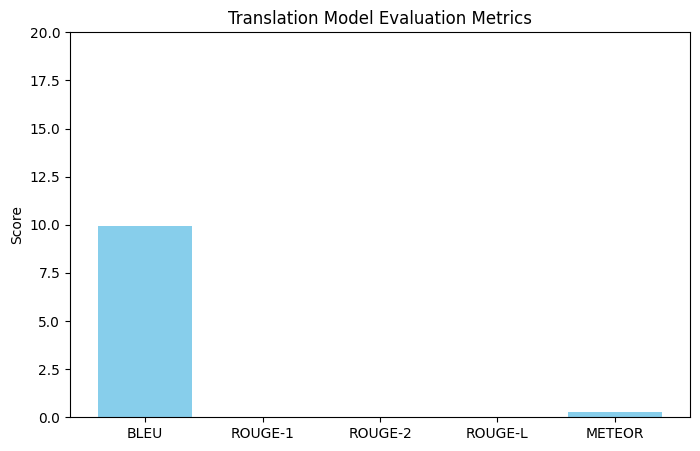


Random Sample of Model Translations:

Source Text (54): आजकल तो आप दिखाई ही नहीं देते।
Generated Translation (54): आजकल ता तुसां दिखदे ही नीं
Target Translation (54): अजकल ता तुसां दुसदे ही नी।

Source Text (20): आगे चल‌कर यही चर्पट नाथ चम्बा के राजा का गुरू भी बना और नौ प्रमुख नाथों के रूप में विख्यात हुआ 
Generated Translation (20): अग्गे चली के एही चरपट नाथ चम्बे दे राजे दा गुरू बी बणेया कन्नैं नौ प्रमुखा नाथां दे रूपे च बख्यात होया
Target Translation (20): गांह चल्ली के एही चर्पट नाथ ,  चम्बे दे राजे दा गुरू बि बणेया, कनै नौ मुख नाथां दे तौर पर मसूह्र ( मसहूर ) होया ।

Source Text (26): मैं बाजार से आ रही हूँ शांति बहन।
Generated Translation (26): मैं बजारे ते ओआ दी शांति भैणा
Target Translation (26): मैं बजारा ते ओआदी शान्ति बोब्बो। 

Source Text (499): क्या करें चार चूल्हे में पकानी पड़ती हैं, बाकी गैस पर।
Generated Translation (499): क्या करना चार चुल्ही च पकाणी पौंदी बाकी गैस पर
Target Translation (499): क्या करना चार चुल्ली च दफणा पौंदे, बाकी गैसा पर। 

Source Text (180): लज्

In [36]:

# Translate and evaluate
generated_translations = [translate_text(text, 'hin_Deva', 'kang_Deva') for text in src_texts]

# Calculate BLEU score
bleu = calculate_bleu(generated_translations, tgt_texts)
print(f"BLEU Score: {bleu:.2f}")

# Calculate ROUGE scores
rouge1, rouge2, rougeL = calculate_rouge(generated_translations, tgt_texts)
print(f"ROUGE-1 Score: {rouge1:.2f}")
print(f"ROUGE-2 Score: {rouge2:.2f}")
print(f"ROUGE-L Score: {rougeL:.2f}")

# Calculate METEOR score
meteor = calculate_meteor(generated_translations, tgt_texts)
print(f"METEOR Score: {meteor:.2f}")

# Plot the results
plot_metrics(bleu, rouge1, rouge2, rougeL, meteor)
print_random_translations(src_texts,generated_translations, tgt_texts)



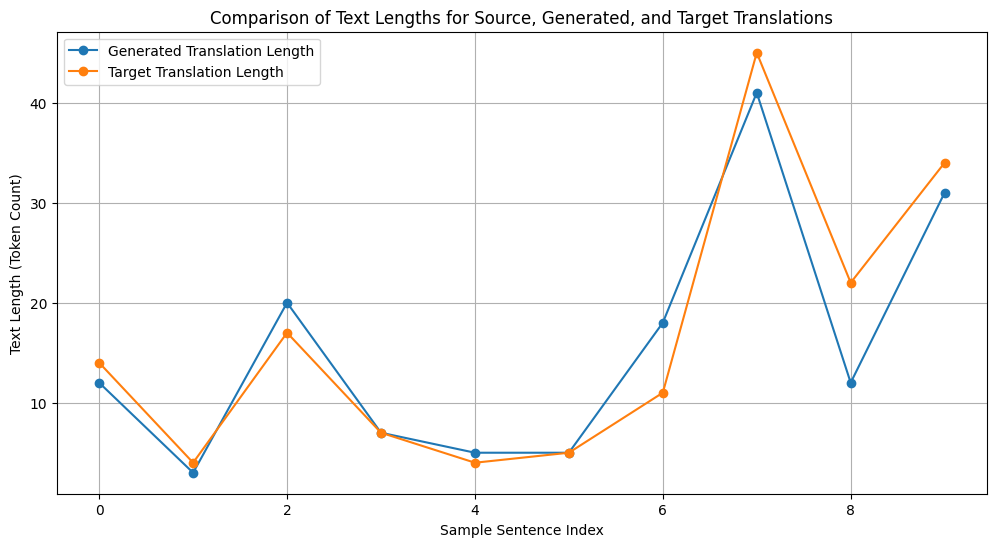

In [26]:
import matplotlib.pyplot as plt
import random

# Function to calculate the length of each sentence as a proxy for comparing translations
def get_text_lengths(source_texts, generated_translations, target_texts):
    src_lengths = [len(text.split()) for text in source_texts]
    gen_lengths = [len(text.split()) for text in generated_translations]
    tgt_lengths = [len(text.split()) for text in target_texts]
    return src_lengths, gen_lengths, tgt_lengths

# Function to plot the lengths of source, generated, and target translations for comparison
def plot_translation_lengths(source_texts, generated_translations, target_texts, num_samples=10):
    # Select random indices for the sample
    sample_indices = random.sample(range(len(source_texts)), num_samples)

    # Filter sample data
    src_sample = [source_texts[i] for i in sample_indices]
    gen_sample = [generated_translations[i] for i in sample_indices]
    tgt_sample = [target_texts[i] for i in sample_indices]

    # Get text lengths for plotting
    src_lengths, gen_lengths, tgt_lengths = get_text_lengths(src_sample, gen_sample, tgt_sample)

    # Plotting
    plt.figure(figsize=(12, 6))
   # plt.plot(range(num_samples), src_lengths, marker='o', label="Source Text Length")
    plt.plot(range(num_samples), gen_lengths, marker='o', label="Generated Translation Length")
    plt.plot(range(num_samples), tgt_lengths, marker='o', label="Target Translation Length")

    plt.title("Comparison of Text Lengths for Source, Generated, and Target Translations")
    plt.xlabel("Sample Sentence Index")
    plt.ylabel("Text Length (Token Count)")
    plt.legend()
    plt.grid()
    plt.show()

# Generate the plot
plot_translation_lengths(src_texts, generated_translations, tgt_texts)


In [ ]:
rouge2


0.0

In [ ]:
meteor

0.2720452009134146

In [ ]:
rougeL


0.018

In [ ]:
bleu

9.943218505346707